In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "YI"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/YI/baseline

Average verified rate: 0.954840959632199

Average of error rates: 0.053144118987918855

Total token count: 22191127



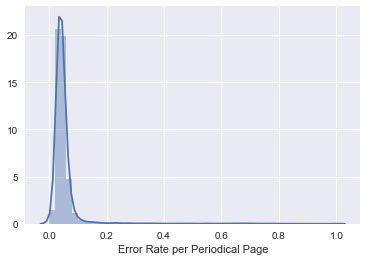

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 500 )

[('ñ', 59838),
 ('-', 45430),
 ("'", 26245),
 ('¥', 18681),
 ('e', 11544),
 ('m', 10449),
 ('d', 9608),
 (')', 9375),
 ('re-', 7994),
 ('in-', 6999),
 ('con-', 6855),
 ('t', 6773),
 ('w', 6692),
 ('tion', 6489),
 ('r', 6056),
 ('be-', 6020),
 ('n', 5009),
 ('f', 4486),
 ('com-', 4446),
 ('g', 4266),
 ('de-', 4027),
 ('ex-', 3826),
 ('ment', 3094),
 ('(', 2983),
 ('dis-', 2931),
 ('per-', 2446),
 ('un-', 2411),
 ('co', 2248),
 ('en-', 2248),
 ('¥¥', 2137),
 ('pro-', 2103),
 ('an-', 2018),
 ('tions', 1860),
 ('im-', 1724),
 ('some-', 1698),
 ('_', 1657),
 ('al-', 1654),
 ('*', 1645),
 ('--', 1636),
 ('/', 1632),
 ('ac-', 1626),
 ('mis-', 1621),
 ('ful', 1603),
 ('pre-', 1558),
 ('x', 1553),
 ('ap-', 1439),
 ('ers', 1438),
 ('to-', 1404),
 ('ple', 1351),
 ('io', 1327),
 ('for-', 1301),
 ('ex', 1254),
 ('k', 1237),
 ('peo-', 1227),
 ('ments', 1196),
 ('at-', 1121),
 ('ence', 1119),
 ('sab-', 1073),
 ('ad-', 1066),
 ('hun-', 1056),
 ('chil-', 1039),
 ('dren', 1024),
 ("'tis", 1008),
 ('u', 

## Review Special Characters

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)

[('ñ', 59838),
 ('¥', 18681),
 (')', 9375),
 ('(', 2983),
 ('¥¥', 2137),
 ('_', 1657),
 ('*', 1645),
 ('/', 1632),
 (']', 982),
 ('(poetry)', 974),
 ('ñthe', 863),
 ('ã', 823),
 ('=', 810),
 ('__', 778),
 ('(concluded', 743),
 ('minutes)', 732),
 ('(see', 714),
 ('+', 692),
 ('ñselected', 650),
 ('\\', 558),
 ('%', 510),
 ('¥¥¥', 480),
 ('—', 480),
 ('(the', 478),
 ('•', 436),
 ('`', 423),
 ('¡', 400),
 ('ña', 384),
 ('[the', 359),
 ('___', 336),
 ('(to', 323),
 ('(a', 306),
 ('(for', 304),
 ('ô', 290),
 ('(verse', 288),
 ('-¥', 285),
 ('¥the', 259),
 ('[', 255),
 ('¥¥¥¥', 247),
 ('(ten', 245),
 ('ñand', 213),
 ('(a)', 213),
 ('(five', 212),
 ('(b)', 212),
 ('ñsel', 210),
 ('ñs', 207),
 ('(or', 206),
 ('(may', 196),
 ('(fifteen', 194),
 ('ñno', 194),
 ('(march', 184),
 ('(december', 184),
 ('(august', 181),
 ('(i', 181),
 ('(july', 179),
 ('(january', 177),
 ('(june', 176),
 ('(november', 175),
 ('(concluded)', 175),
 ('¥-', 175),
 ('(april', 175),
 ('(september', 173),
 ('(october', 1

## Correction 1 -- Normalize Special Characters

In [14]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/YI/correction1

Average verified rate: 0.9621264210859254

Average of error rates: 0.04386494187371781

Total token count: 22090413



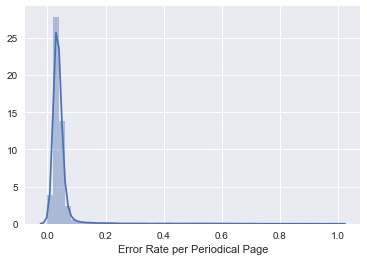

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 47905),
 ("'", 27001),
 ('e', 11949),
 ('m', 10700),
 ('d', 9847),
 ('re-', 8001),
 ('t', 7271),
 ('in-', 7007),
 ('con-', 6864),
 ('w', 6836),
 ('tion', 6504),
 ('r', 6501),
 ('be-', 6026),
 ('n', 5264),
 ('f', 4728),
 ('com-', 4454),
 ('g', 4401),
 ('de-', 4029),
 ('ex-', 3829),
 ('ment', 3103),
 ('dis-', 2933),
 ('per-', 2449),
 ('un-', 2414),
 ('co', 2285),
 ('en-', 2248),
 ('pro-', 2110),
 ('--', 2038),
 ('an-', 2019),
 ('tions', 1864),
 ('im-', 1724),
 ('some-', 1702),
 ('al-', 1657),
 ('x', 1641),
 ('ac-', 1628),
 ('mis-', 1622),
 ('ful', 1607),
 ('pre-', 1559),
 ('ers', 1446),
 ('ap-', 1441),
 ('to-', 1405),
 ('ple', 1355),
 ('io', 1354),
 ('ex', 1344),
 ('k', 1321),
 ('for-', 1303),
 ('peo-', 1227),
 ('ments', 1198),
 ('at-', 1123),
 ('ence', 1121),
 ('sab-', 1074)]

## Correction 2 -- Fix Line Endings

In [20]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/YI/correction2

Average verified rate: 0.979442301938595

Average of error rates: 0.026885115112833376

Total token count: 21818688



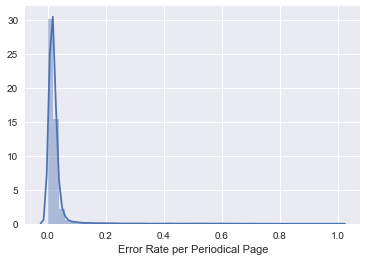

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 47700),
 ("'", 27001),
 ('e', 11926),
 ('m', 10681),
 ('d', 9828),
 ('t', 7225),
 ('w', 6830),
 ('r', 6466),
 ('n', 5251),
 ('f', 4707),
 ('g', 4390),
 ('co', 2281),
 ('--', 2038),
 ('x', 1640),
 ('io', 1354),
 ('ex', 1344),
 ('k', 1315),
 ("'tis", 1033),
 ('u', 1028),
 ('in-', 978),
 ('th', 931),
 ('structor', 893),
 ("an'", 847),
 ('z', 836),
 ('-the', 754),
 ('mt', 738),
 ('id', 722),
 ("'s", 679),
 ("'t", 607),
 ('sabbathschool', 595),
 ('---', 576),
 ('wm', 566),
 ('pp', 564),
 ("'the", 521),
 ('good-by', 519),
 ('four-page', 518),
 ('pa', 513),
 ('ro', 503),
 ('oo', 485),
 ('li', 484),
 ('ma', 455),
 ("'i", 453),
 ('q', 413),
 ("'em", 402),
 ('ti', 341),
 ("the'", 336),
 ('al', 334),
 ("'twas", 325),
 ('eze', 318),
 ('mo', 312)]

## Correction 3 -- Remove Extra Dashes

In [26]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

YI18520801-V01-01-page2.txt: [('-', ''), ('Sab-', 'Sab')]
YI18520801-V01-01-page3.txt: [('twenty-', 'twenty')]
YI18520801-V01-01-page4.txt: [('writ-', 'writ'), ('as-', 'as')]
YI18520801-V01-01-page5.txt: [('-', ''), ('neigh-', 'neigh'), ('to-', 'to'), ('af-', 'af'), ('ground.-', 'ground.'), ('al-', 'al'), ('break-', 'break')]
YI18520801-V01-01-page6.txt: [('-', '')]
YI18520801-V01-01-page7.txt: [('re-', 're'), ('-', '')]
YI18520801-V01-01-page8.txt: [('--', '-'), ('TERMS-', 'TERMS')]
YI18521001-V01-02-page1.txt: [('-', '')]
YI18521001-V01-02-page2.txt: [('ourselves.-', 'ourselves.'), ('Sab-', 'Sab')]
YI18521001-V01-02-page3.txt: [('-', ''), ('-', ''), ('JE-', 'JE'), ('-', '')]
YI18521001-V01-02-page4.txt: [('INSTRUC-', 'INSTRUC')]
YI18521001-V01-02-page5.txt: [('-beaysnl', 'beaysnl')]
YI18521001-V01-02-page6.txt: [('ten-', 'ten'), ('circu-', 'circu')]
YI18521001-V01-02-page7.txt: [('in-', 'in'), ('-', ''), ('-----', '----'), ('.--------', '.-------'), ('--', '-'), ('king-', 'king')]
YI

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/YI/correction3

Average verified rate: 0.9837730872525339

Average of error rates: 0.022360211989970367

Total token count: 21830770



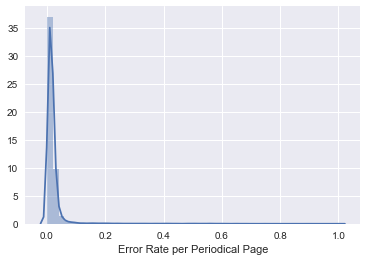

In [29]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 27430),
 ('e', 12202),
 ('m', 10781),
 ('d', 9888),
 ('t', 7541),
 ('w', 6909),
 ('r', 6790),
 ('n', 5365),
 ('f', 4829),
 ('g', 4448),
 ('co', 2574),
 ('x', 1704),
 ('ex', 1558),
 ('io', 1388),
 ('k', 1371),
 ('u', 1075),
 ("'tis", 1035),
 ('th', 957),
 ('id', 895),
 ('z', 894),
 ('structor', 891),
 ("an'", 848),
 ('mt', 744),
 ("'s", 682),
 ('re', 620),
 ("'t", 617),
 ('sabbathschool', 596),
 ('pp', 568),
 ('wm', 567),
 ('ro', 564),
 ('pa', 529),
 ("'the", 523),
 ('li', 514),
 ('oo', 493),
 ('ma', 476),
 ("'i", 455),
 ('-', 443),
 ('q', 426),
 ("'em", 402),
 ('al', 386),
 ('ti', 369),
 ('good-by', 358),
 ("the'", 336),
 ('mo', 331),
 ("'twas", 325),
 ('il', 325),
 ('eze', 318),
 ('ver', 295),
 ('sel', 293),
 ('si', 288)]

## Correction 4 -- Remove Extra Quotation Marks

In [32]:
# %load shared_elements/remove_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

YI18520801-V01-01-page2.txt: [("'are", 'are')]
YI18520801-V01-01-page6.txt: [("'might's", 'mights'), ("'we", 'we'), ("'one", 'one')]
YI18520801-V01-01-page7.txt: [("'for", 'for'), ("'my", 'my')]
YI18521001-V01-02-page1.txt: [("'thy", 'thy')]
YI18521001-V01-02-page2.txt: [("'the", 'the')]
YI18521001-V01-02-page6.txt: [("'or", 'or')]
YI18521001-V01-02-page7.txt: [("'your", 'your'), ('\'Lord."', 'Lord."')]
YI18521001-V01-02-page8.txt: [("'Address", 'Address')]
YI18521201-V01-03-page1.txt: [("'where", 'where')]
YI18521201-V01-03-page3.txt: [("'hell", 'hell')]
YI18521201-V01-03-page4.txt: [("'felt", 'felt')]
YI18521201-V01-03-page6.txt: [("'talk", 'talk'), ("'the", 'the'), ("'humble", 'humble'), ("'that", 'that')]
YI18530101-V01-04-page3.txt: [("'Spring.", 'Spring.')]
YI18530101-V01-04-page4.txt: [("'Tis", 'Tis'), ("'Tis", 'Tis')]
YI18530101-V01-04-page5.txt: [("'INSTRUCTO", 'INSTRUCTO')]
YI18530201-V01-05-page2.txt: [("'end", 'end'), ("'thanked", 'thanked')]
YI18530201-V01-05-page4.txt: [(

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/YI/correction4

Average verified rate: 0.9843602643090736

Average of error rates: 0.02168748575336221

Total token count: 21833681



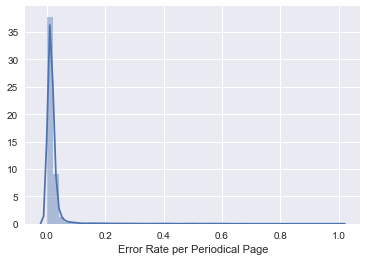

In [35]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [36]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 26244),
 ('e', 12288),
 ('m', 11081),
 ('d', 10155),
 ('t', 9298),
 ('w', 6932),
 ('r', 6862),
 ('n', 5779),
 ('f', 4859),
 ('g', 4461),
 ('co', 2581),
 ('x', 1707),
 ('ex', 1559),
 ('io', 1389),
 ('k', 1378),
 ('u', 1080),
 ('th', 961),
 ('id', 903),
 ('z', 900),
 ('structor', 893),
 ("an'", 828),
 ('re', 759),
 ('mt', 749),
 ('sabbathschool', 596),
 ('wm', 569),
 ('pp', 569),
 ('ro', 564),
 ('pa', 530),
 ('li', 517),
 ('oo', 508),
 ('ma', 480),
 ('em', 479),
 ('-', 444),
 ('q', 428),
 ('al', 388),
 ('ti', 371),
 ('good-by', 358),
 ('il', 333),
 ('mo', 331),
 ("the'", 331),
 ('eze', 318),
 ('ver', 295),
 ('sel', 293),
 ('si', 290),
 ('ft', 289),
 ('ne', 278),
 ('mi', 257),
 ('mc', 254),
 ('pt', 249),
 ('op', 245)]

## Correction 5 -- Rejoin Burst Words

In [38]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    GoH.clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

YI18530501-V01-08-page8.txt: [('As', 'As')]
YI18530801-V01-11,12-page16.txt: [('Be', 'Be'), ('\nH e a v e n ', 'Heaven')]
YI18540501-V02-05-page2.txt: [('It', 'It')]
YI18540601-V02-06-page8.txt: [('So', 'So')]
YI18540701-V02-07-page5.txt: [('It', 'It')]
YI18551001-V03-10-page10.txt: [('We', 'We')]
YI18600701-V08-07-page7.txt: [('To', 'To')]
YI18711215-V19-24-page4.txt: [('We', 'We'), ('Do', 'Do')]
YI18790115-V27-03-page4.txt: [('If', 'If')]
YI18790312-V27-11-page3.txt: [('No', 'No')]
YI18790903-V27-35-page6.txt: [('To', 'To')]
YI18790903-V27-35-page7.txt: [('El', 'El')]
YI18791203-V27-48-page7.txt: [('Du', 'Du')]
YI18800218-V28-08-page7.txt: [('El', 'El')]
YI18800602-V28-23-page7.txt: [('Du', 'Du')]
YI18800825-V28-35-page6.txt: [('It', 'It')]
YI18800825-V28-35-page7.txt: [('It', 'It')]
YI18801208-V28-50-page6.txt: [('El', 'El')]
YI18801208-V28-50-page7.txt: [('Is', 'Is')]
YI18810928-V29-39-page2.txt: [('It', 'It')]
YI18810928-V29-39-page6.txt: [('It', 'It'), ('If', 'If'), ('In', 'In'),

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/YI/correction5

Average verified rate: 0.9843625149574331

Average of error rates: 0.021682755869614774

Total token count: 21833626



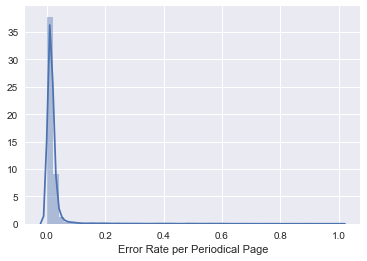

In [41]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [42]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 26244),
 ('e', 12240),
 ('m', 11076),
 ('d', 10141),
 ('t', 9270),
 ('w', 6927),
 ('r', 6831),
 ('n', 5752),
 ('f', 4850),
 ('g', 4451),
 ('co', 2581),
 ('x', 1706),
 ('ex', 1559),
 ('io', 1389),
 ('k', 1378),
 ('u', 1072),
 ('th', 961),
 ('id', 903),
 ('z', 900),
 ('structor', 893),
 ("an'", 829),
 ('re', 759),
 ('mt', 749),
 ('sabbathschool', 596),
 ('wm', 569),
 ('pp', 569),
 ('ro', 564),
 ('pa', 530),
 ('li', 518),
 ('oo', 508),
 ('ma', 480),
 ('em', 479),
 ('-', 444),
 ('q', 428),
 ('al', 388),
 ('ti', 370),
 ('good-by', 358),
 ('il', 333),
 ('mo', 331),
 ("the'", 331),
 ('eze', 318),
 ('ver', 295),
 ('sel', 293),
 ('si', 290),
 ('ft', 289),
 ('ne', 278),
 ('mi', 257),
 ('mc', 254),
 ('pt', 249),
 ('op', 245)]

## Correction 6 -- Rejoin Split Words

In [44]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

YI18520801-V01-01-page8.txt: [('kr', 'a')]
YI18521001-V01-02-page4.txt: [('INSTRUC', 'TOR')]
YI18521001-V01-02-page7.txt: [('Suf', 'fer')]
YI18521001-V01-02-page8.txt: [('re', 'paid')]
YI18521201-V01-03-page8.txt: [('pre', 'paid'), ('Platt', 'E')]
YI18530201-V01-05-page5.txt: [('ferv', 'ent')]
YI18530301-V01-06-page8.txt: [('re', 'gularly')]
YI18530401-V01-07-page2.txt: [('re', 'united')]
YI18530401-V01-07-page8.txt: [('Ostro', 'goths'), ('TE', 'E')]
YI18530501-V01-08-page5.txt: [('th', 'in')]
YI18530601-V01-09-page8.txt: [('proph', 'et')]
YI18530801-V01-11,12-page4.txt: [('Olt', 'on')]
YI18530801-V01-11,12-page6.txt: [('ful', 'a')]
YI18530801-V01-11,12-page7.txt: [('SANCTUAR', 'Y')]
YI18530801-V01-11,12-page8.txt: [('ma', 'de')]
YI18540101-V02-01-page6.txt: [('agai', 'n')]
YI18540301-V02-03-page3.txt: [('ca', 'ddo')]
YI18540301-V02-03-page8.txt: [('G.', '')]
YI18540401-V02-04-page2.txt: [('ly', 'on')]
YI18540501-V02-05-page1.txt: [('Ril', 'L'), ('wa', 'ter')]
YI18540601-V02-06-page2.t

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/YI/correction6

Average verified rate: 0.9845413854884776

Average of error rates: 0.021439309322999773

Total token count: 21830611



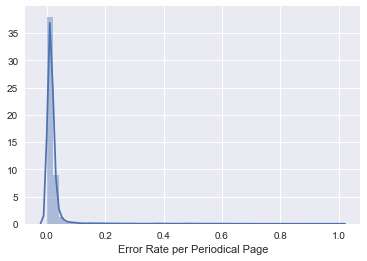

In [47]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [48]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 26244),
 ('e', 12088),
 ('m', 11196),
 ('d', 10115),
 ('t', 9181),
 ('w', 6915),
 ('r', 6760),
 ('n', 5703),
 ('f', 4843),
 ('g', 4456),
 ('co', 2316),
 ('x', 1690),
 ('ex', 1541),
 ('io', 1388),
 ('k', 1372),
 ('u', 1070),
 ('z', 900),
 ('id', 896),
 ('structor', 893),
 ('th', 874),
 ("an'", 829),
 ('mt', 746),
 ('sabbathschool', 596),
 ('wm', 569),
 ('pp', 569),
 ('re', 531),
 ('pa', 514),
 ('ro', 512),
 ('oo', 507),
 ('em', 471),
 ('-', 444),
 ('li', 443),
 ('ma', 431),
 ('q', 427),
 ('good-by', 358),
 ('ti', 333),
 ("the'", 331),
 ('al', 326),
 ('il', 322),
 ('eze', 318),
 ('mo', 316),
 ('ver', 292),
 ('sel', 291),
 ('ft', 289),
 ('si', 259),
 ('ne', 259),
 ('pt', 249),
 ('ay', 231),
 ('zo', 227),
 ('mi', 220)]

## Correction 7 -- Rejoin Split Words II

In [50]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction7"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

YI18520801-V01-01-page3.txt: [('M', 'oe'), ('m', 'ay')]
YI18520801-V01-01-page7.txt: [('to', 're')]
YI18521201-V01-03-page3.txt: [('he', 're')]
YI18521201-V01-03-page4.txt: [('so', 'ny')]
YI18530201-V01-05-page2.txt: [('a', 'IL')]
YI18530301-V01-06-page5.txt: [('lo', 're')]
YI18530301-V01-06-page8.txt: [('who', 'op')]
YI18530501-V01-08-page3.txt: [('J', 'od')]
YI18530601-V01-09-page2.txt: [('to', 're')]
YI18530601-V01-09-page8.txt: [('m', 'ite')]
YI18530801-V01-11,12-page11.txt: [('s', 'acrifice')]
YI18530801-V01-11,12-page14.txt: [('a', 'ble')]
YI18530801-V01-11,12-page16.txt: [('Be', 'asts'), ('Be', 'auties')]
YI18530801-V01-11,12-page3.txt: [('a', 'neNt')]
YI18530801-V01-11,12-page7.txt: [('hap', 'py')]
YI18540101-V02-01-page3.txt: [('an', 'il')]
YI18540101-V02-01-page8.txt: [('love', 'th')]
YI18540201-V02-02-page6.txt: [('IN', 'STRUCTOR')]
YI18540301-V02-03-page6.txt: [('to', 'THER')]
YI18540501-V02-05-page1.txt: [('be', 'lieved')]
YI18540501-V02-05-page3.txt: [('minis', 'ters')]
Y

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/YI/correction7

Average verified rate: 0.9846857689483086

Average of error rates: 0.021269090494643265

Total token count: 21827410



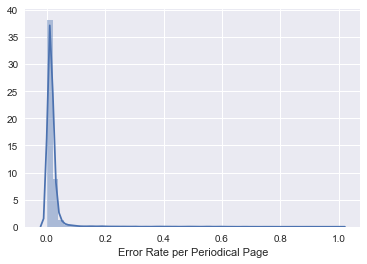

In [53]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [54]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 26242),
 ('e', 12040),
 ('m', 11121),
 ('d', 10079),
 ('t', 9118),
 ('w', 6865),
 ('r', 6722),
 ('n', 5689),
 ('f', 4817),
 ('g', 4437),
 ('co', 2300),
 ('x', 1690),
 ('ex', 1541),
 ('io', 1387),
 ('k', 1368),
 ('u', 1055),
 ('z', 896),
 ('id', 881),
 ('th', 861),
 ("an'", 829),
 ('mt', 746),
 ('sabbathschool', 596),
 ('wm', 569),
 ('pp', 569),
 ('pa', 512),
 ('ro', 509),
 ('oo', 503),
 ('em', 469),
 ('-', 444),
 ('li', 429),
 ('re', 425),
 ('ma', 423),
 ('q', 422),
 ('good-by', 358),
 ("the'", 331),
 ('eze', 318),
 ('ti', 315),
 ('mo', 313),
 ('al', 308),
 ('il', 308),
 ('sel', 291),
 ('ver', 283),
 ('ft', 281),
 ('si', 252),
 ('pt', 249),
 ('ne', 244),
 ('zo', 226),
 ('ay', 216),
 ('mi', 215),
 ('op', 212)]

## Review Remaining Errors

In [55]:
GoH.reports.docs_with_high_error_rate(summary)

[('YI19111024-V59-43-page1.txt', 1.0),
 ('YI19130506-V61-18-page1.txt', 0.9),
 ('YI19170206-V65-06-page1.txt', 0.851),
 ('YI19111121-V59-47-page1.txt', 0.765),
 ('YI19150831-V63-35-page1.txt', 0.75),
 ('YI19130121-V61-03-page1.txt', 0.708),
 ('YI19140811-V62-32-page1.txt', 0.685),
 ('YI19130729-V61-30-page1.txt', 0.684),
 ('YI19130513-V61-19-page11.txt', 0.68),
 ('YI19140421-V62-16-page1.txt', 0.673),
 ('YI19140428-V62-17-page1.txt', 0.671),
 ('YI19190701-V67-26-page1.txt', 0.644),
 ('YI19121119-V60-47-page1.txt', 0.632),
 ('YI19140804-V62-31-page1.txt', 0.63),
 ('YI19150112-V63-02-page1.txt', 0.622),
 ('YI19130107-V61-01-page1.txt', 0.615),
 ('YI19130325-V61-12-page12.txt', 0.609),
 ('YI19141208-V62-49-page1.txt', 0.605),
 ('YI19190603-V67-22-page17.txt', 0.6),
 ('YI19170213-V65-07-page1.txt', 0.6),
 ('YI19110509-V59-19-page1.txt', 0.6),
 ('YI19071203-V55-49-page1.txt', 0.6),
 ('YI19161114-V64-46-page1.txt', 0.6),
 ('YI19170109-V65-02-page1.txt', 0.598),
 ('YI19121231-V60-53-page1.txt

In [56]:
inspect = ['YI19130513-V61-19-page11.txt', 'YI19130325-V61-12-page12.txt','YI19190603-V67-22-page17.txt', 
           'YI19030611-V51-22-page5.txt', 'YI19180604-V66-23-page15.txt', 'YI19130211-V61-06-page12.txt',
          'YI19190408-V67-14-page12.txt','YI19130114-V61-02-page13.txt'
          ]

In [58]:
# %load shared_elements/high_error_rates.py
# doc_keys = [x[0] for x in GoH.reports.docs_with_high_error_rate(summary) if x[1] > 0.2]

GoH.utilities.open_original_docs(inspect, directories['cycle'])

Opened files: 

YI19130513-V61-19-page11.txt

YI19130325-V61-12-page12.txt

YI19190603-V67-22-page17.txt

YI19030611-V51-22-page5.txt

YI19180604-V66-23-page15.txt

YI19130211-V61-06-page12.txt

YI19190408-V67-14-page12.txt

YI19130114-V61-02-page13.txt



Beyond the first page, the high error pages are charts of donations and images.

In [59]:
GoH.reports.long_errors(errors_summary, min_length=15)

(['steam-locomotive',
  'fischer-carnahan',
  'iniciimminiiimmincomm',
  'whenjesushadmadean',
  'attorney-general',
  'vvalpielimiielsimilmultai',
  'well-disciplined',
  'steamers-of-the-air',
  'hopelessjmillions',
  'rwifromhereandthere',
  "ontribittors'iside",
  'andworkingtowardtheheart',
  'philosopherstell',
  'proshiftlessnessinpreparation',
  'whomdidjesusreceivehelp',
  'egtigeoaerreweripapaevapipage',
  'surveying-instrument',
  'stateremunerated',
  'treacherouslymurderedhim',
  'ichotsiakatatklumia',
  'siihstaevrevaosuinsgter',
  'good-intentioned',
  'ifitimitivwwwititytthityymitimyttimitythmitymmttimhymyytitititttyytyttivitittimityvywitimihty',
  'paraffin-covered',
  'mmwmmmwmrimmmmnmmmmmsnmm',
  'ictoriouslyconquered',
  'one-to-three-minute',
  'disappointrequires',
  'religiousiegislation',
  'act-of-parliament',
  'austrian-hungarian',
  'monomeiiiffriomtat',
  'thinnessasuitable',
  'perhapsishouldqualifythis',
  'ycfhavazoopakepacieffh',
  'green-emblazenod',
 

## Correction 8 -- Remove Long Error Strings

In [73]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = "correction7"
cycle = "correction8"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "t|T"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "m|M"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "i|I"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "a|A"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "w|W"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "x|X"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

YI18540301-V02-03-page4.txt: [('MIIMPLIIIPPPIIIIIMPIMill', ' ')]
YI18820301-V30-09-page1.txt: [('iiiPliiiiiiilliii', ' ')]
YI18860512-V34-19-page4.txt: [('IIIIIIIIIIMIniffiq', ' ')]
YI18881010-V36-41-page4.txt: [('liniimiinimiiimeniiiiiiminiMilitill', ' ')]
YI18950711-V43-28-page1.txt: [('IIIIIIIIIMIIMINI', ' ')]
YI18951017-V43-42-page1.txt: [('ANNIMMONAINUMMUMEMM', ' ')]
YI18951212-V43-50-page1.txt: [("X'sNUMMMUMMUMNUMUMM", ' ')]
YI18980901-V46-35-page26.txt: [('WAAAWAAANAAAMAAAAAAAAAAAAAAAWAAAAAAAAAAAAAANWAAAAAA', ' ')]
YI18980901-V46-35-page28.txt: [('ttSSIOttttAkttttlr', ' ')]
YI18990316-V47-11-page3.txt: [('VetinholWAINAAAAAINAAAAAAtNeltonioNAAAPIO', ' '), ('AAWNAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwAAAAAAAA"AANAAWAAAAA', ' ')]
YI18990316-V47-12-page3.txt: [('OVVVONNIVVYNAMAAAAAANNAAAAAAAANWAAAAAAAAAAAAAAAA', ' ')]
YI18990406-V47-14-page3.txt: [('NAWANNtioiAAAIIIINVIVIAAAAAAAAAAAAAAAAAAAAINAAAAANIVNAAAAAAAA', ' ')]
YI18990810-V47-32-page5.txt: [('lollLIIIIIIIIIIII', ' ')]
YI1899092

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/YI/correction8

Average verified rate: 0.9846951982210088

Average of error rates: 0.0211667426487349

Total token count: 21827202



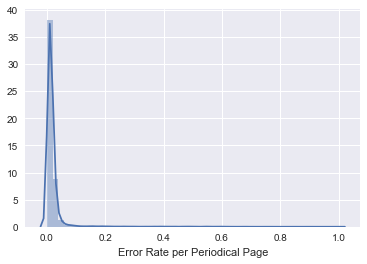

In [74]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [75]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 26242),
 ('e', 12040),
 ('m', 11116),
 ('d', 10079),
 ('t', 9116),
 ('w', 6865),
 ('r', 6722),
 ('n', 5689),
 ('f', 4817),
 ('g', 4437),
 ('co', 2300),
 ('x', 1690),
 ('ex', 1541),
 ('io', 1387),
 ('k', 1368),
 ('u', 1055),
 ('z', 896),
 ('id', 881),
 ('th', 861),
 ("an'", 829),
 ('mt', 746),
 ('sabbathschool', 596),
 ('wm', 569),
 ('pp', 569),
 ('pa', 512),
 ('ro', 509),
 ('oo', 503),
 ('em', 469),
 ('-', 444),
 ('li', 429),
 ('re', 425),
 ('ma', 423),
 ('q', 422),
 ('good-by', 358),
 ("the'", 331),
 ('eze', 318),
 ('ti', 315),
 ('mo', 313),
 ('al', 308),
 ('il', 308),
 ('sel', 291),
 ('ver', 283),
 ('ft', 281),
 ('si', 252),
 ('pt', 249),
 ('ne', 244),
 ('zo', 226),
 ('ay', 216),
 ('mi', 215),
 ('op', 212)]

## Correction 9 -- Separate Squashed Words

In [76]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = "correction8"
cycle = "correction9"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = GoH.utilities.readfile(directories['prev'], filename)
    GoH.normalize.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
    maxword = max(len(x) for x in sorted_list_of_words)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = GoH.normalize.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if GoH.normalize.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

YI18520801-V01-01-page3.txt: [('sawMountSinaiwherethela', 'saw Mount Sinai where the la')]
YI18530301-V01-06-page6.txt: [('PROPRIMPIRIPPIROrill', 'PRO P RIM P IR I P P IR Or ill')]
YI18530601-V01-09-page2.txt: [('hischariotsandhorses', 'his chariots and horses')]
YI18530801-V01-11,12-page10.txt: [('unchangeablepriestand', 'unchangeable priest and')]
YI18530801-V01-11,12-page6.txt: [('migipirmipaPPAmplIMIIIIIMPPRIPMNIMINPOPI', 'm i g i p i r m i p a P P A m p l I M I I I I I M P P R I P M N I M I N P O P I')]
YI18530801-V01-11,12-page9.txt: [('individualslthroughout', 'individuals l throughout')]
YI18540401-V02-04-page2.txt: [('mampurgypppipmuipmpointrawil', 'mam pur g y p p p i p m u i p m p o i n t r a w i l')]
YI18540501-V02-05-page6.txt: [('mopipFieipipoommintuiprilpIMF', 'mop i p Fie i pi poo m m i n t u i p r i l p I M F')]
YI18540601-V02-06-page8.txt: [('nORRRORIPIRPROSIRORSPIS', 'nO R R R O R I P I R P R O S I R O R S P I S')]
YI18540801-V02-08-page1.txt: [('disappointrequires',

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/YI/correction9

Average verified rate: 0.9846851797106194

Average of error rates: 0.021071860041030316

Total token count: 21831598



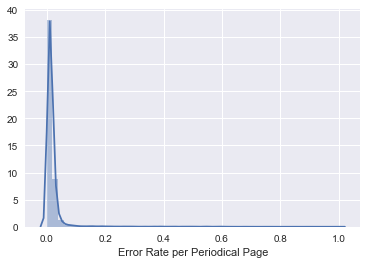

In [79]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [80]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 26242),
 ('e', 12171),
 ('m', 11247),
 ('d', 10103),
 ('t', 9239),
 ('w', 6902),
 ('r', 6807),
 ('n', 5794),
 ('f', 4854),
 ('g', 4475),
 ('co', 2300),
 ('x', 1696),
 ('ex', 1541),
 ('k', 1404),
 ('io', 1387),
 ('u', 1100),
 ('z', 909),
 ('id', 881),
 ('th', 861),
 ("an'", 829),
 ('mt', 746),
 ('sabbathschool', 596),
 ('wm', 569),
 ('pp', 569),
 ('pa', 512),
 ('ro', 509),
 ('oo', 503),
 ('em', 469),
 ('-', 444),
 ('li', 429),
 ('q', 425),
 ('re', 425),
 ('ma', 423),
 ('good-by', 358),
 ("the'", 331),
 ('eze', 318),
 ('ti', 315),
 ('mo', 313),
 ('al', 308),
 ('il', 308),
 ('sel', 291),
 ('ver', 283),
 ('ft', 281),
 ('si', 252),
 ('pt', 249),
 ('ne', 244),
 ('zo', 226),
 ('ay', 216),
 ('mi', 215),
 ('op', 212)]

## Correction 10 -- Make Common Character Substitutions

In [84]:
# %load shared_elements/make_common_substitutions.py
prev = "correction9"
cycle = "correction10"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

subs = GoH.utilities.readfile('/Users/jeriwieringa/Dissertation/drafts/data', 'common_substitutions.txt')  
sub_list = subs.split('\n')
common_substitutions = [tuple(i.split('\t')) for i in sub_list]
    
corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)
    errors_updated = []
    for error in errors:
        if not error.lower() in spelling_dictionary:
            errors_updated.append(error)
            
    replacements = []
    for error in errors_updated:
        if len(error) > 1:
            for sub in common_substitutions:
                pattern = sub[0]
                if re.search(pattern, error):
                    test_sub = re.sub(pattern, sub[1], error)
                    if test_sub.lower() in spelling_dictionary:
                        replacements.append((error, test_sub))

    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)  
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

YI18520801-V01-01-page2.txt: [('ork', 'orr')]
YI18521001-V01-02-page3.txt: [('tv', 'ty')]
YI18521201-V01-03-page1.txt: [('Mk', 'Mr')]
YI18521201-V01-03-page3.txt: [('ve', 'ye')]
YI18521201-V01-03-page8.txt: [('Platt', 'Flatt')]
YI18530101-V01-04-page1.txt: [('Pid', 'Fid')]
YI18530101-V01-04-page8.txt: [('ine', 'me')]
YI18530201-V01-05-page4.txt: [('coine', 'come')]
YI18530201-V01-05-page5.txt: [('tlie', 'the')]
YI18530201-V01-05-page7.txt: [('OP', 'OF')]
YI18530301-V01-06-page4.txt: [('plir', 'phr')]
YI18530301-V01-06-page5.txt: [('pakt', 'part')]
YI18530301-V01-06-page6.txt: [('je', 'ye')]
YI18530501-V01-08-page1.txt: [('ok', 'or')]
YI18530501-V01-08-page5.txt: [('WIIAT', 'WHAT')]
YI18530701-V01-10-page1.txt: [('OP', 'OF'), ('ine', 'me')]
YI18530701-V01-10-page4.txt: [('ver', 'yer'), ('ves', 'yes')]
YI18530801-V01-11,12-page10.txt: [('forin', 'form')]
YI18530801-V01-11,12-page11.txt: [('IIeb', 'Heb')]
YI18530801-V01-11,12-page12.txt: [('IP', 'IF')]
YI18530801-V01-11,12-page14.txt: [('

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/YI/correction10

Average verified rate: 0.9844072518176143

Average of error rates: 0.021207317073170737

Total token count: 21845668



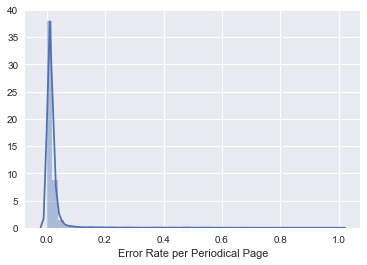

In [87]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [88]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 26246),
 ('e', 13124),
 ('m', 11305),
 ('d', 10403),
 ('t', 9319),
 ('r', 7629),
 ('w', 6942),
 ('n', 6203),
 ('f', 4885),
 ('g', 4498),
 ('co', 2365),
 ('x', 1697),
 ('ex', 1541),
 ('k', 1408),
 ('io', 1387),
 ('u', 1100),
 ('z', 910),
 ('id', 881),
 ('th', 873),
 ("an'", 829),
 ('mt', 746),
 ('ry', 606),
 ('sabbathschool', 596),
 ('pp', 570),
 ('wm', 569),
 ('ne', 559),
 ('pa', 518),
 ('ro', 510),
 ('re', 500),
 ('oo', 489),
 ('em', 470),
 ('-', 444),
 ('ma', 430),
 ('q', 427),
 ('li', 421),
 ('gi', 415),
 ('ttle', 415),
 ('mo', 360),
 ('good-by', 358),
 ("the'", 331),
 ('il', 330),
 ('al', 323),
 ('ti', 321),
 ('eze', 318),
 ('sel', 301),
 ('ft', 288),
 ('ng', 286),
 ('se', 280),
 ('ver', 263),
 ('si', 253)]